<a href="https://colab.research.google.com/github/tengfeixia/RN_avec_des_incertitudes_propag-es/blob/main/DNN_2_3_incertitudes_propag%C3%A9es_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X= 3*np.arange(-5,5,0.001)

X = np.atleast_2d(X)
X = X.T
sigmax = ((2*0.05*np.sqrt(2))/6)*np.ones_like(X)
var_x = np.square(sigmax)
var_y = np.square (np.cos(0.5*X)+1)*var_x
print (sigmax)
print (np.shape(X))

Y= 2*np.sin(0.5*X)+X



[[0.02357023]
 [0.02357023]
 [0.02357023]
 ...
 [0.02357023]
 [0.02357023]
 [0.02357023]]
(10000, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


<ErrorbarContainer object of 3 artists>

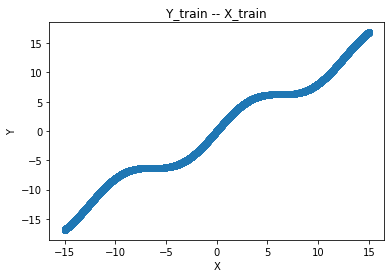

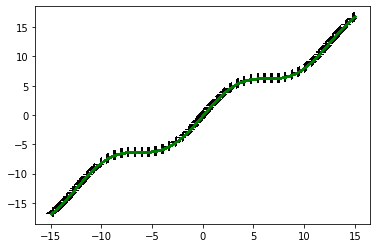

In [ ]:
plt.figure()
plt.title ("Y_train -- X_train")
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")


fig , ax = plt.subplots()
ax.errorbar (X,Y,yerr = var_y, xerr = var_x, fmt ="x", markersize = 1, color = "green", ecolor="black", elinewidth=10)

In [ ]:
# cas classique
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
import tensorflow as tf



In [ ]:
MSEs = []
model = keras.Sequential ([
                           Dense (4, input_shape = ((1,))), Activation('relu'),
                           Dense (4), Activation('relu'),
                           Dense (4), Activation('relu'),
                           Dense (1), Activation(None)
])
my_opti = tf.keras.optimizers.Adam()

model.compile (optimizer = my_opti, loss= 'mse' )

history = model.fit (X, Y, batch_size=10,epochs=40)


Epoch 1/40
1000/1000 [==============================] - 15s 1ms/step - loss: 55.5244
Epoch 2/40
1000/1000 [==============================] - 1s 1ms/step - loss: 30.9137
Epoch 3/40
1000/1000 [==============================] - 1s 1ms/step - loss: 24.9143
Epoch 4/40
1000/1000 [==============================] - 1s 1ms/step - loss: 20.8035
Epoch 5/40
1000/1000 [==============================] - 1s 1ms/step - loss: 18.0284
Epoch 6/40
1000/1000 [==============================] - 1s 1ms/step - loss: 14.5410
Epoch 7/40
1000/1000 [==============================] - 1s 1ms/step - loss: 11.7686
Epoch 8/40
1000/1000 [==============================] - 1s 1ms/step - loss: 9.8827
Epoch 9/40
1000/1000 [==============================] - 1s 1ms/step - loss: 8.4268
Epoch 10/40
1000/1000 [==============================] - 1s 1ms/step - loss: 7.2376
Epoch 11/40
1000/1000 [==============================] - 1s 1ms/step - loss: 5.9453
Epoch 12/40
1000/1000 [==============================] - 1s 1ms/step - loss: 

<function matplotlib.pyplot.show>

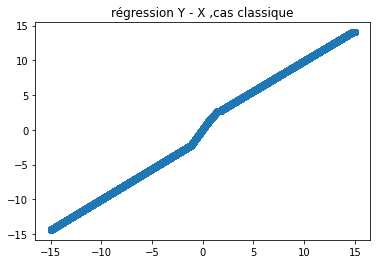

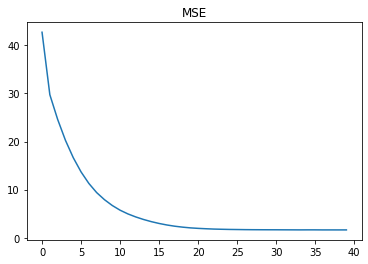

In [ ]:
plt.figure()
plt.title ("régression Y - X ,cas classique")
plt.scatter (X, model(X))

plt.figure()
plt.title("MSE")
plt.plot(history.history ['loss'])
plt.show



weights [[-0.08103972 -0.98278945  0.19088052  0.17797034]]
bias [0. 0. 0. 0.]
weights [[ 0.20040465 -0.07851031  0.15874101 -0.38754656]
 [-0.09127959 -0.53502236 -0.00602491  0.65448966]
 [ 0.45005877  0.47403663 -0.13282813 -0.69935475]
 [ 0.34322491 -0.42450804  0.64513946 -0.89162868]]
bias [0. 0. 0. 0.]
weights [[ 0.1772137   0.51062674 -0.31521527  0.2997933 ]
 [-0.5091567   0.95651136  0.68334029  0.16493366]
 [ 0.41654037 -0.00145622  0.3618733   0.3710124 ]
 [ 0.1607033  -0.16507842  0.99369045  0.01664298]]
bias [0. 0. 0. 0.]
weights [[-0.30427808]
 [ 0.70539744]
 [-0.38610161]
 [ 0.20973671]]
bias [0.]
MSE classique 1.7755686366110734 0
MSE: 24758798.44015053 0
MSE classique 1.858832595547023 10
MSE: 16967725.858697005 10
MSE classique 1.9055009753487138 20
MSE: 11556450.027079536 20
MSE classique 1.8732815388635677 30
MSE: 6037415.446971418 30
MSE classique 1.8519336923736758 40
MSE: 1622063.3805226544 40
MSE classique 1.880024367511726 50
MSE: 30202919.789378546 50
MSE cl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:236: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


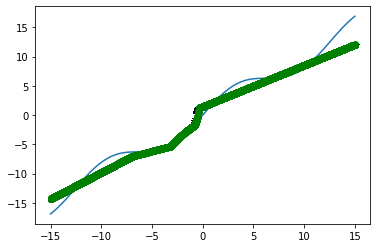

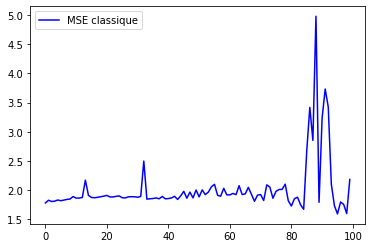

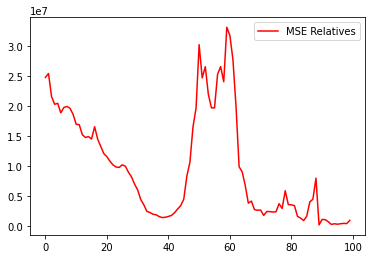

In [ ]:
class Layer:

    def __init__ (self,n_input,n_neurons, activation = None, weights = None, bias = None):

        """
        int n_input: nb de noeuds entrées (nb de noeuds de la couche précédente)
        int n_neurons: nb de noeuds sorties (nb de noeuds de la couche actuelle)
        str activation: type de la fonction d'activation 
        weights, bias: généré dans les couches
        """

        self.weights = weights if weights is not None else np.random.randn(n_input,n_neurons)*np.sqrt(2/(n_neurons+n_input))
        print ("weights", self.weights)
        self.incer_weights = None 
        
        self.bias = bias if bias is not None else np.zeros((n_neurons))
        print ("bias", self.bias)
                        
        self.nb_neurons = n_neurons 

        self.activation = activation
        self.activation_value = None
        self.error = None
        self.delta = None
        self.gradient = None
        self.x = None
        self.z = None

        #pour adam
        #bias
        self.v_b = 0
        self.grad_sq_b = 0
        self.v_hat_b = 0
        self.grad_sq_hat_b = 0

        #weights
        self.v_w = 0
        self.grad_sq_w = 0
        self.v_hat_w = 0
        self.grad_sq_hat_w = 0
        self.grad = None 

        #incertitude
        self.sigmay = None 


        # feed forward propagation

    def feedforward (self,x):
        self.x = x
        z = np.dot (x,self.weights) + self.bias # z = wx+b
        self.z =z
        self.activation_value = self.apply_activation (z)
        #print (self.weights)
        return self.activation_value

        # fonction d'activaiton

    def feedforward_incertitude (self, sigmay):
        
        self.incer_weights = np.array (np.square (self.weights),copy = True)
        sigmay = np.dot (sigmay, self.incer_weights)
        sigmay = np.square(self.apply_activation_derivation (self.activation_value))*sigmay
        return sigmay
        


    def apply_activation(self, z):

        if self.activation is None:
            return z
        elif self.activation == "relu":
            return np.maximum(z, 0)
        elif self.activation == "tanh":
            return np.tanh(z)
        elif self.activation == "sigmoid":
            return 1 / (1 + np.exp(-z))
    

        # dérivés des fonctions d'activation,， attention le input c'est a, value activé
    def apply_activation_derivation(self, a):

        if self.activation is None:
            return np.ones_like(a)
        elif self.activation == "relu":
            grad = np.array(a, copy=True)
            grad[a > 0] = 1.
            grad[a<= 0] = 0.
            return grad
        elif self.activation == "tanh":
            return 1 - a**2
        elif self.activation == "sigmoid":
            return a* (1 - a)
# Neural Network

class NN:
    def __init__ (self):
        self.__layers = []
        self.layer_incertitude = None
        
        #paramètres adam
        self.gamma = 0.9
        self.beta = 0.99
        self.epsilon = 10**-8
        

    def add_layer (self, layer): #add layer
        self.__layers.append(layer)

    def feed_forward (self, X): # X --> my_nn.feed_forward (X) --> y_predict
        for layer in self.__layers:
            X = layer.feedforward (X)
        return X

    def feed_forward_incertitude (self, sigma):
        for layer in self.__layers:
            sigma = layer.feedforward_incertitude(sigma)
        return sigma

    def back_propagation (self, X_train, y_train,sigmay,facteur_incer, lr):
        y_predict = self.feed_forward(X_train)

        layer_incertitude = self.feed_forward_incertitude (sigmay)*facteur_incer
        self.layer_incertitude = layer_incertitude 
        #print ("predict",y_predict)
        #print ("incertitude", layer_incertitude)

        for i in reversed(range(len(self.__layers))):
            current_layer = self.__layers[i] #get layer            
    
            if current_layer == self.__layers [-1]:  # si current == couche output
                #print ("delta y",y_predict - y_train)
                
                current_layer.error = (y_predict - y_train)/(layer_incertitude)
                #print ("layer error",current_layer.error)
                #print ("layer incertitude", layer_incertitude)
                """
                for element in layer_incertitude:
                    if element < 1e-10:
                        element = 1e-10
                """
                current_layer.delta = 2*current_layer.error * current_layer.apply_activation_derivation (y_predict)
                
                previous_layer = self.__layers [i-1]
                
                #print ("delta_output", current_layer.delta)

                #adam pour bias            
                current_layer.v_b = self.gamma*current_layer.v_b + (1-self.gamma)*current_layer.delta
                current_layer.grad_sq_b = self.beta*current_layer.grad_sq_b + (1- self.beta)*np.square (current_layer.delta)
                current_layer.v_hat_b = current_layer.v_b / (1- self.gamma)
                current_layer.grad_sq_hat_b = current_layer.grad_sq_b / (1- self.beta)
                #print ("test1",current_layer.bias)
                current_layer.bias -= lr * np.divide (current_layer.v_hat_b, np.sqrt (current_layer.grad_sq_hat_b+ self.epsilon) )

                #print ("test2",current_layer.bias)
                
                
                #adam pour weights
                
                current_layer.grad = current_layer.delta*(np.atleast_2d(previous_layer.activation_value)).T
                current_layer.v_w = self.gamma*current_layer.v_w + (1-self.gamma)*current_layer.grad
                current_layer.grad_sq_w= self.beta*current_layer.grad_sq_w + (1-self.beta)*np.square(current_layer.grad)
                current_layer.v_hat_w = current_layer.v_w / (1- self.gamma)
                current_layer.grad_sq_hat_w = current_layer.grad_sq_w/ (1- self.gamma)
                current_layer.weights -= lr*np.divide(current_layer.v_hat_w,np.sqrt(current_layer.grad_sq_hat_w+self.epsilon))
                

            
            else:
                next_layer = self.__layers[i+1] #les incertitudes dépendent de la couche prochaine
                
                current_layer.error = np.dot(next_layer.weights, next_layer.delta)

                #print ("layer erroe",current_layer.error)
                #print ("fprime",current_layer.apply_activation_derivation(current_layer.activation_value))
                current_layer.delta = current_layer.error* current_layer.apply_activation_derivation(current_layer.activation_value)
                #print ("delta",current_layer.delta)
                #print ("delta_layers", current_layer.delta)

                # ________________________________adam pour bias
                current_layer.v_b = self.gamma*current_layer.v_b + (1-self.gamma)*current_layer.delta
                current_layer.grad_sq_b = self.beta*current_layer.grad_sq_b + (1- self.beta)*np.square (current_layer.delta)
                current_layer.v_hat_b = current_layer.v_b / (1- self.gamma)
                current_layer.grad_sq_hat_b = current_layer.grad_sq_b / (1- self.beta)
                #print ("test3",current_layer.bias)
                current_layer.bias -= lr * np.divide (current_layer.v_hat_b, np.sqrt (current_layer.grad_sq_hat_b+ self.epsilon) )
                #print ("test4",current_layer.bias)

                #__________________________________adam pour weights

                
                previous_layer = self.__layers [i-1]
    
                current_layer.grad = current_layer.delta*(np.atleast_2d(previous_layer.activation_value if current_layer != self.__layers [0] else X_train )).T
                current_layer.v_w = self.gamma*current_layer.v_w + (1-self.gamma)*current_layer.grad
                current_layer.grad_sq_w= self.beta*current_layer.grad_sq_w + (1-self.beta)*np.square(current_layer.grad)
                current_layer.v_hat_w = current_layer.v_w / (1- self.gamma)
                current_layer.grad_sq_hat_w = current_layer.grad_sq_w/ (1- self.gamma)
                current_layer.weights -= lr*np.divide(current_layer.v_hat_w,np.sqrt(current_layer.grad_sq_hat_w+self.epsilon))



    def train (self,X_train,X_test,y_train,y_test,sigmay,facteur_incer, lr, epochs):
        mses = []
        mses_relatives=[]
        
        monitor =0
        for i in range (epochs):
            for j in range (len (X_train)):

                self.back_propagation(X_train[j],y_train[j],var_y[j],facteur_incer,lr)

            mse_train = np.mean(np.square(self.feed_forward(X_train)- y_train))
            if i % 10 ==0:
                print ("MSE classique", mse_train,i)

            mses.append (mse_train)
            

            if i % 1 ==0:
                    
                mse_relative = np.mean(np.square((self.feed_forward(X_train)- y_train)/self.layer_incertitude))
                if i%10 ==0:
                    print ("MSE:", mse_relative,i)
                mses_relatives.append(mse_relative)

                #plt.figure()
                #plt.suptitle(i)
                #plt.plot (X_test,self.feed_forward(X_test), "x", markersize = 6)

        fig, ax = plt.subplots()
        x = np.linspace(-15,15,100) #print the cruve sin (6x)
        y = 2*np.sin(0.5*x)+x
        plt.plot (x,y)
        ax.errorbar (X_test,self.feed_forward(X_test),yerr = self.feed_forward_incertitude(var_x), fmt = "o", color = "green", ecolor = "black",elinewidth = 10)

        return mses, mses_relatives



    


my_nn = NN()
my_nn.add_layer(Layer(1, 4, "relu")) 
my_nn.add_layer(Layer(4, 4, "relu"))  
my_nn.add_layer(Layer(4, 4, "relu"))
my_nn.add_layer(Layer(4, 1, None))  



#X_train, X_test, y_train, y_test = train_test_split (X,Y,test_size = 0.25,shuffle = False) #!!!!!!!!

#mses = my_nn.train(X_train[0:1,:] ,X_test,y_train[0:1,:],y_test,sigmay [0:1,:],0.005,1)
mses, mses_relatives = my_nn.train(X,X,Y,Y,var_x ,1,1e-4,100)

plt.figure()
plt.plot(mses, 'b', label='MSE classique')
plt.legend()
plt.figure()
plt.plot (mses_relatives,'r', label = 'MSE Relatives')
plt.legend()

[[0.00044377]
 [0.00044377]
 [0.00044377]
 ...
 [0.00082741]
 [0.00082741]
 [0.00082741]]


Text(0, 0.5, 'var_y')

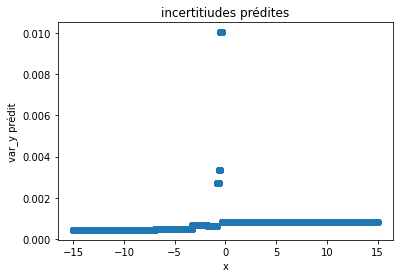

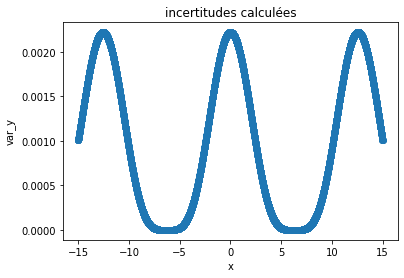

In [ ]:
print (my_nn.feed_forward_incertitude(var_x))
plt.figure()
plt.title("incertitiudes prédites")
plt.scatter(X,my_nn.feed_forward_incertitude(var_x))
plt.xlabel("x")
plt.ylabel("var_y prédit")

plt.figure()
plt.title("incertitudes calculées")
plt.scatter(X,var_y)
plt.xlabel("x")
plt.ylabel("var_y")
